# <span style="color: #002A5D;">Research Question </span>
## <span style="color: #002A5D;">*Can we train a model to predict the BTC close price 30 days into the future?*</span>
By __Yiqun Fang__, part of Group 9 including: __Kevin Armstrong__ and __Babak Mokri__

## Introduction

Bitcoin is a digital currency created in January 2009 following the housing market crash. Over the course of bitcoin's history, it has undergone rapid growth to become a significant currency both on and offline. In this project, we are going to train some models to do prediction about Bitcoin price.

The data used for the project is drawn from Kaggle website which includes the various daily bitcoin prices in the stock and 3 daily financial factors for the years 2012 to 2020. This data appears in time series format with the intervals of one minute. The dataset can be found here:
https://www.kaggle.com/mczielinski/bitcoin-historical-data


## Dataset Description & Exploratory

There are totally 4,363,457 records in which 28.35% of them are null data, leaving 3,126,480 valuable records for us to conduct our analysis.

The attributes consists of: 
 
One ordinal attribute i.e. Timestamp, which is in Unix epoch date format with the interval on every 60 seconds 
7 Numeric attributes including 
* __Open:__ Open price at start time window
* __High:__ High price within time window
* __Low:__ Low price within time window 
* __Close:__ Close price at the end of time window
* __Volume_(BTC):__ Amount of BTC transacted in time window
* __Volume_(Currency):__ Amount of Currency transacted in time window
* __Weighted_Price:__ volume-weighted average price (VWAP)

After excluding all null data from this dataset, there remains no additional missing data in the entire dataset which saved us a lot of work for data preprocessing. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
df = pd.read_csv("bitstampUSD_1-min_data_2012-01-01_to_2020-04-22.csv")

df['Timestamp'] = pd.to_datetime(df['Timestamp'],unit='s')
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df = df.dropna()
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,2011-12-31 15:50:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,2011-12-31 16:59:00,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,2011-12-31 17:00:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,2012-01-01 04:16:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


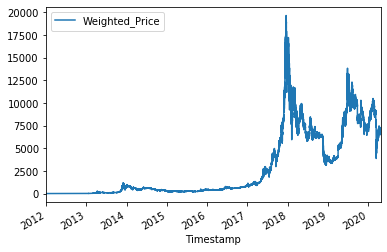

In [3]:
df.plot(x = "Timestamp",y = "Weighted_Price")
plt.show()

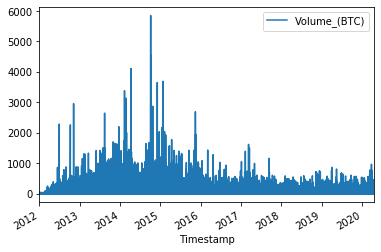

In [4]:
df.plot(x = "Timestamp",y = "Volume_(BTC)")
plt.show()

In [6]:
# Resampling to daily frequency
df.index = df.Timestamp
df = df.resample('D').mean()

# Resampling to monthly frequency
df_month = df.resample('M').mean()

# Resampling to annual frequency
df_year = df.resample('A-DEC').mean()

# Resampling to quarterly frequency
df_Q = df.resample('Q-DEC').mean()

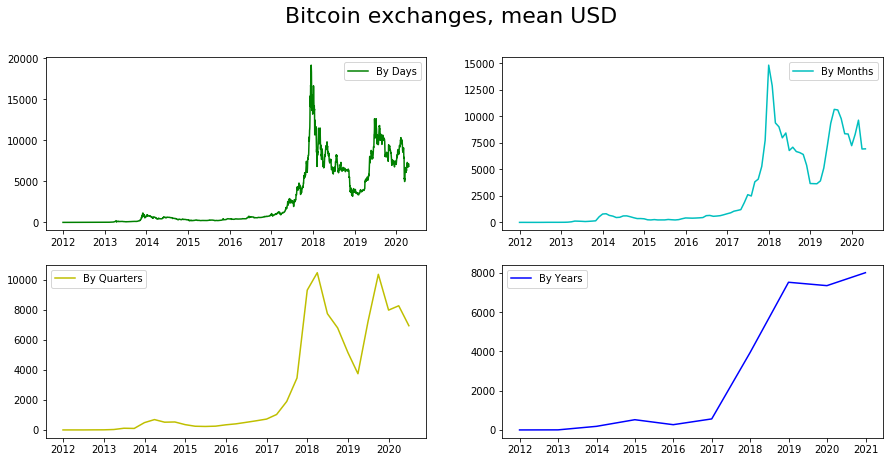

In [7]:
# PLOTS
fig = plt.figure(figsize=[15, 7])
plt.suptitle('Bitcoin exchanges, mean USD', fontsize=22)

plt.subplot(221)
plt.plot(df.Weighted_Price, 'g-', label='By Days')
plt.legend()

plt.subplot(222)
plt.plot(df_month.Weighted_Price, 'c-', label='By Months')
plt.legend()

plt.subplot(223)
plt.plot(df_Q.Weighted_Price, 'y-', label='By Quarters')
plt.legend()

plt.subplot(224)
plt.plot(df_year.Weighted_Price, 'b-', label='By Years')
plt.legend()

# plt.tight_layout()
plt.show()

We calculated the mean of bitcoin price and bitcoin transaction volume by day, month, quarter and year, and illustrated those in graphs as follows. 

As the graph above shows, the price was slightly increasing before 2017. After 2017, the price of bitcoin skyrocketed, and then the price decreased during the period from 2018 to 2019. The price has been fluctuating slightly in recent years.


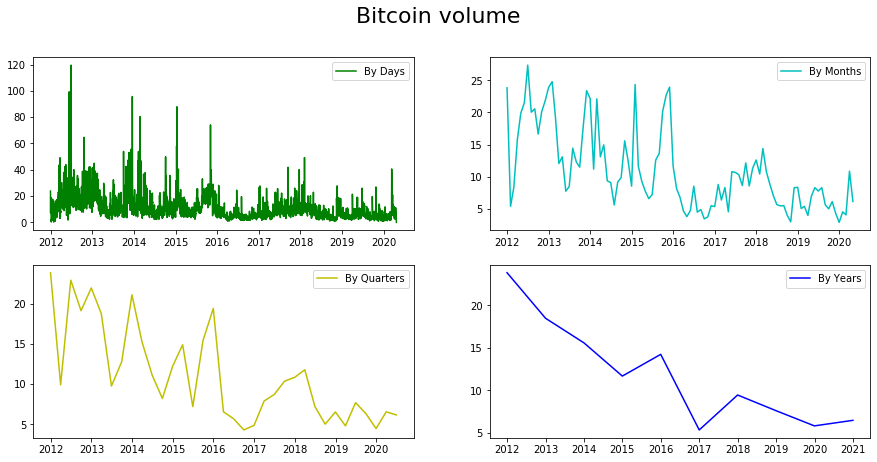

In [8]:
# PLOTS
fig = plt.figure(figsize=[15, 7])
plt.suptitle('Bitcoin volume', fontsize=22)

plt.subplot(221)
plt.plot(df['Volume_(BTC)'], 'g-', label='By Days')
plt.legend()

plt.subplot(222)
plt.plot(df_month['Volume_(BTC)'], 'c-', label='By Months')
plt.legend()

plt.subplot(223)
plt.plot(df_Q['Volume_(BTC)'], 'y-', label='By Quarters')
plt.legend()

plt.subplot(224)
plt.plot(df_year['Volume_(BTC)'], 'b-', label='By Years')
plt.legend()

# plt.tight_layout()
plt.show()

The graph above shows 2016 and 2017 witnessed a sharp fall in The volume of bitcoin transactions, and if we look at the left bottom graph, the overall trend of bitcoin transaction volume is falling. 
Probably because of the limitation of the bitcoin number, and the increasing difficulty of mining bitcoin in recent years.

## External Dataset

Because the original dataset has only six attributes and those attributes are very similar and highly related, and the open price, close price and weighted price are almost equal, we introduced new attributes that might have influence on Bitcoin price from Yahoo Finance, including Gold Price, volatility index, and S&P 500 and Oil price.

* __Volatility Index:__
    * About: the volatility index tracks how much stock prices are rising and falling within a day
    * Intuition: As volatility rises, BTC price may rise 
* __S&P 500:__
    * About: An index of the top 500 stocks in the US
    * Intuition: Unsure. 
* __Gold Price:__
    * About: Price per ounce of gold in USD
    * Intuition: As the price of gold rises the price of BTC may rise
* __Oil Price:__
    * About: Crude oil price (USD)
    * Intuition: Unsure. 


---
## -> *Can we train a model to predict the BTC close price 30 days into the future?*

## Techniques

Apart from the new attributes we introduced from the external dataset, we also created a new column, BTC price in 30 days by shifting the existing BTC price column. Time Periods are from Dec 1st 2017 through July 30th 2020. The target column is BTC price in 30 days. The features we have:
* Gold price
* Volatility Index
* S&P 500
* Oil Price
* BTC Transaction Volume
* BTC price 

To solve this problem, we use the __linear regression model__ to identify the relationship between BTC price in 30 days and other attributes. In addition, ridge regression and lasso regression are used to do the feature selection. Moreover, we use the grid search library for tuning the hyperparameter. 


In [12]:
import datetime
import os
import yfinance as yf
from math import exp, expm1, sqrt
#from sklearn.metrics import make_scorer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import seaborn as sbn

In [2]:
#explore data from Yahoo Finance
btc = yf.Ticker("BTC-USD")
vix = yf.Ticker("^VIX")
snp = yf.Ticker("^GSPC")
gld = yf.Ticker("GC=F")
oil = yf.Ticker("CL=F?P=CL=F")

print(vix)
print(btc)
print(snp)
print(gld)
print(oil)


yfinance.Ticker object <^VIX>
yfinance.Ticker object <BTC-USD>
yfinance.Ticker object <^GSPC>
yfinance.Ticker object <GC=F>
yfinance.Ticker object <CL=F?P=CL=F>


In [3]:
#download btc data as datafram
df = yf.download("BTC-USD ^VIX ^GSPC GC=F CL=F?P=CL=F", start="2017-12-01", end="2020-07-30", group_by="ticker")
# get the list of columns
list(df.columns)


[*********************100%***********************]  5 of 5 completed


[('^GSPC', 'Open'),
 ('^GSPC', 'High'),
 ('^GSPC', 'Low'),
 ('^GSPC', 'Close'),
 ('^GSPC', 'Adj Close'),
 ('^GSPC', 'Volume'),
 ('GC=F', 'Open'),
 ('GC=F', 'High'),
 ('GC=F', 'Low'),
 ('GC=F', 'Close'),
 ('GC=F', 'Adj Close'),
 ('GC=F', 'Volume'),
 ('^VIX', 'Open'),
 ('^VIX', 'High'),
 ('^VIX', 'Low'),
 ('^VIX', 'Close'),
 ('^VIX', 'Adj Close'),
 ('^VIX', 'Volume'),
 ('BTC-USD', 'Open'),
 ('BTC-USD', 'High'),
 ('BTC-USD', 'Low'),
 ('BTC-USD', 'Close'),
 ('BTC-USD', 'Adj Close'),
 ('BTC-USD', 'Volume'),
 ('CL=F?P=CL=F', 'Open'),
 ('CL=F?P=CL=F', 'High'),
 ('CL=F?P=CL=F', 'Low'),
 ('CL=F?P=CL=F', 'Close'),
 ('CL=F?P=CL=F', 'Adj Close'),
 ('CL=F?P=CL=F', 'Volume')]

In [4]:
# delete header level and drop columns
df.columns = df.columns.droplevel()
df = df.drop(['Open', 'High', 'Low', 'Adj Close'], axis = 1)
df.head()

,Close,Volume,Close,Volume,Close,Volume,Close,Volume,Close,Volume
Date,,,,,,,,,,
2017-12-01,2642.219971,3.942320e+09,1278.800049,823.0,11.43,0.0,10975.599609,6783119872,58.360001,685215.0
2017-12-02,NaN,NaN,NaN,NaN,NaN,NaN,11074.599609,5138500096,NaN,NaN
2017-12-03,NaN,NaN,NaN,NaN,NaN,NaN,11323.200195,6608309760,NaN,NaN
2017-12-04,2639.439941,4.023150e+09,1274.300049,850.0,11.68,0.0,11657.200195,6132409856,57.470001,529965.0
2017-12-05,2629.570068,3.539040e+09,1261.599976,1499.0,11.33,0.0,11916.700195,6895260160,57.619999,499245.0


In [5]:
#rename column headers
df.set_axis(['SP_500','S_volume','Gold','G_volume','Volatility','V_volume', 'BTC','BTC_volume','Oil','O_volume'], axis=1, inplace=True)
df=df.drop(['G_volume','S_volume','V_volume','O_volume'], axis=1)
df.head()

,SP_500,Gold,Volatility,BTC,BTC_volume,Oil
Date,,,,,,
2017-12-01,2642.219971,1278.800049,11.43,10975.599609,6783119872,58.360001
2017-12-02,NaN,NaN,NaN,11074.599609,5138500096,NaN
2017-12-03,NaN,NaN,NaN,11323.200195,6608309760,NaN
2017-12-04,2639.439941,1274.300049,11.68,11657.200195,6132409856,57.470001
2017-12-05,2629.570068,1261.599976,11.33,11916.700195,6895260160,57.619999


In [6]:
#fill forward values
df.fillna(method='ffill', inplace=True)
#df['SP_500'].fillna(method='ffill', inplace=True)
#df['Gold'].fillna(method='ffill', inplace=True)
#df['Volatility'].fillna(method='ffill', inplace=True)
#df['BTC'].fillna(method='ffill', inplace=True)

In [7]:
#predict n days to future
pred_days = 30 

#Create another column (the target or dependent variable) shifted 'n' units up
df['BTC_in_30_Days'] = df[['BTC']].shift(-pred_days)
df.head(35)

,SP_500,Gold,Volatility,BTC,BTC_volume,Oil,BTC_in_30_Days
Date,,,,,,,
2017-12-01,2642.219971,1278.800049,11.43,10975.599609,6783119872,58.360001,14156.400391
2017-12-02,2642.219971,1278.800049,11.43,11074.599609,5138500096,58.360001,13657.200195
2017-12-03,2642.219971,1278.800049,11.43,11323.200195,6608309760,58.360001,14982.099609
2017-12-04,2639.439941,1274.300049,11.68,11657.200195,6132409856,57.470001,15201.000000
2017-12-05,2629.570068,1261.599976,11.33,11916.700195,6895260160,57.619999,15599.200195
2017-12-06,2629.270020,1262.800049,11.02,14291.500000,12656300032,55.959999,17429.500000
2017-12-07,2636.979980,1249.800049,10.16,17899.699219,17950699520,56.689999,17527.000000
2017-12-08,2651.500000,1245.199951,9.58,16569.400391,21135998976,57.360001,16477.599609
2017-12-09,2651.500000,1245.199951,9.58,15178.200195,13911300096,57.360001,15170.099609


In [8]:
df_2=df

df = df[0:-30]
df.head()




,SP_500,Gold,Volatility,BTC,BTC_volume,Oil,BTC_in_30_Days
Date,,,,,,,
2017-12-01,2642.219971,1278.800049,11.43,10975.599609,6783119872,58.360001,14156.400391
2017-12-02,2642.219971,1278.800049,11.43,11074.599609,5138500096,58.360001,13657.200195
2017-12-03,2642.219971,1278.800049,11.43,11323.200195,6608309760,58.360001,14982.099609
2017-12-04,2639.439941,1274.300049,11.68,11657.200195,6132409856,57.470001,15201.000000
2017-12-05,2629.570068,1261.599976,11.33,11916.700195,6895260160,57.619999,15599.200195


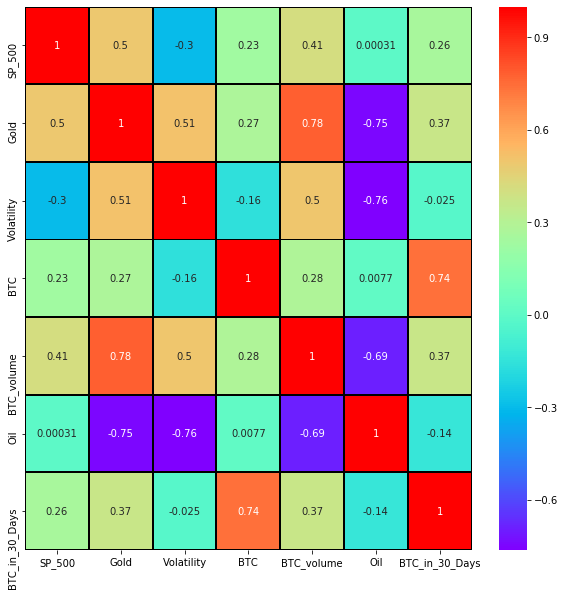

In [14]:
#correlation helps us to find out which of the fields are related to each other..
plt.figure(figsize=(10, 10))
sbn.heatmap(df.corr(), annot=True, cmap='rainbow', linewidths=1, linecolor='black')

As this correlation heatmap shows, Bitcoin price in 30 days is more related to current Bitcoin price, Gold price, Bitcoin transaction volume and S&P 500. Considering the limited number of features and the sufficient data we have, we did not delete any of those features at this step.

We split the dataset into two subsets sequentially, one is for training with time period fromDec 1st 2017 through May 31th 2020 and the other is for testing with time period from June 1st 2020 through June 30th 2020. 


## Constraints
The Bitcoin price can be determined and influenced by many features, such as policies, market demand, the number of competing cryptocurrencies, the stock behaviour and even some economic news. It is extremely hard to predict the future price of Bitcoin only based on those features we got. This research question mainly focuses on the basic machine learning algorithm and process applying, and figuring out if it is possible to use linear regression models to predict Bitcoin price. 

In [16]:
# split data
df_train= df[:len(df)-pred_days]
df_test= df[len(df)-pred_days:]

In [18]:
X = df_train.loc[: , ['SP_500', 'Gold', 'Volatility', 'Oil','BTC', 'BTC_volume']]
y = df_train.loc[: , ['BTC_in_30_Days']]
X_test = df_test.loc[: , ['SP_500', 'Gold', 'Volatility', 'Oil','BTC', 'BTC_volume']]
y_test = df_test.loc[: , ['BTC_in_30_Days']]
normalized_X = preprocessing.normalize(X)
normalized_X2 = preprocessing.normalize(X_test)

## Results
Not to our surprise, the performance of all three models is not strong. 

### LinearRegression

In [19]:

from sklearn.model_selection import cross_val_score

lin_reg = LinearRegression()
lin_reg.fit(X,y)
MSEs = cross_val_score(lin_reg, X, y , scoring='neg_mean_squared_error', cv=5)
mean_MSEs =np.mean(MSEs)
print(mean_MSEs)

-3614744.750434288


In [20]:
lin_reg.coef_

array([[-5.20502111e-01,  1.83481898e+00, -1.68432204e+01,
        -1.37773804e-01,  5.73821633e-01,  2.68314306e-08]])

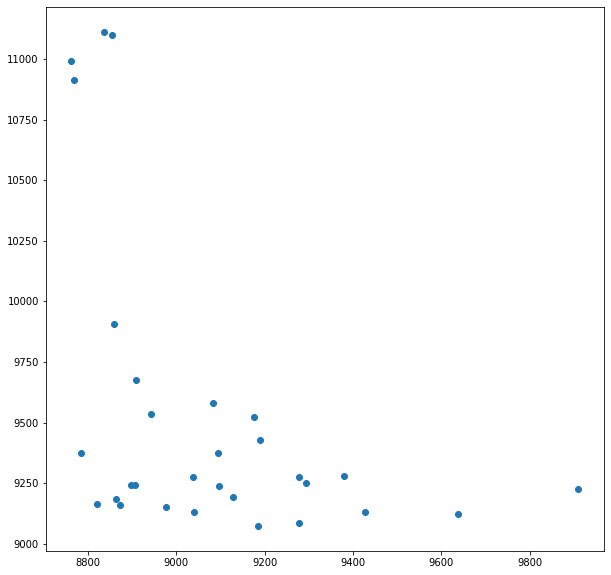

In [21]:
import matplotlib.pyplot as plt
pred_linear = lin_reg.predict(X_test)
plt.figure(figsize=(10,10))
plt.scatter(pred_linear,y_test)
plt.show()

In [22]:
lin_reg.score(X_test,y_test)

-1.1259069957565315

### Ridge Regression

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge =Ridge()
parameters = {'alpha': [exp(i-10) for i in range(30)]}
ridge_regressor = GridSearchCV(ridge, parameters, cv=5)
ridge_regressor.fit(X,y)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

/Users/fangyiqun/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.15707e-19): result may not be accurate.
  overwrite_a=True).T
/Users/fangyiqun/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.14173e-19): result may not be accurate.
  overwrite_a=True).T
/Users/fangyiqun/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.45616e-20): result may not be accurate.
  overwrite_a=True).T
/Users/fangyiqun/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.24784e-19): result may not be accurate.
  overwrite_a=True).T
/Users/fangyiqun/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.37

/Users/fangyiqun/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.24921e-19): result may not be accurate.
  overwrite_a=True).T
/Users/fangyiqun/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.37693e-19): result may not be accurate.
  overwrite_a=True).T
/Users/fangyiqun/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.1609e-19): result may not be accurate.
  overwrite_a=True).T
/Users/fangyiqun/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.146e-19): result may not be accurate.
  overwrite_a=True).T
/Users/fangyiqun/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.49314

{'alpha': 8886110.520507872}
-0.178662718454637


/Users/fangyiqun/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.45579e-18): result may not be accurate.
  overwrite_a=True).T
/Users/fangyiqun/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.71928e-18): result may not be accurate.
  overwrite_a=True).T
/Users/fangyiqun/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.61556e-18): result may not be accurate.
  overwrite_a=True).T
/Users/fangyiqun/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.42917e-18): result may not be accurate.
  overwrite_a=True).T
/Users/fangyiqun/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.76

In [24]:
pred_ridge = ridge_regressor.predict(X_test)
ridge_regressor.score(X_test, y_test)

-1.376907494942761

In [25]:
ridge_regressor.best_estimator_.coef_

array([[ 1.45547677e-01,  5.26704635e-01, -2.64409418e-02,
        -2.24907694e-02,  5.91761475e-01,  2.73423650e-08]])


### Lasso Regression

In [26]:
from sklearn.linear_model import Lasso 
lasso = Lasso()
parameters = {'alpha': [exp(i-10) for i in range(30)]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 59874.14171519782}
-3027688.2971629384


/Users/fangyiqun/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [27]:
pred_lasso = lasso_regressor.predict(X_test)
lasso_regressor.score(X_test,y_test)


-1191376.572625215

In [28]:
lasso_regressor.best_estimator_.coef_

array([ 0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        5.86154841e-01,  3.36251463e-08])

### Analysis

The first scatter plot below shows the Bitcoin price during July 2020 and the corresponding prediction made by those three models. It is obvious that all of the three models failed to perform predictions accurately.

The second scatter plot below compares the Bitcoin price in the training set and the corresponding prediction made by three models, linear regression, ridge regression and lasso regression model.


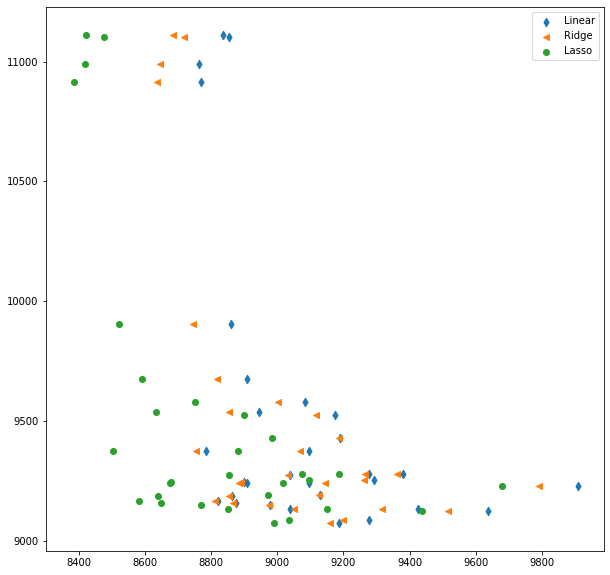

In [42]:
plt.figure(figsize=(10,10))
chart_1=plt.scatter(pred_linear,y_test, marker='d')
chart_2=plt.scatter(pred_ridge,y_test, marker='<')
chart_3=plt.scatter(pred_lasso,y_test, marker='o')

plt.legend((chart_1,chart_2,chart_3),('Linear','Ridge','Lasso')) 
plt.show()

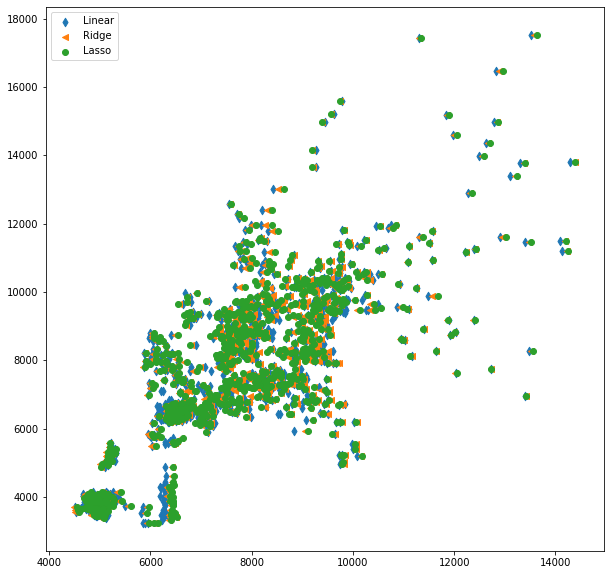

In [43]:
plt.figure(figsize=(10,10))
chart_1=plt.scatter(lin_reg.predict(X),y, marker='d')
chart_2=plt.scatter(ridge_regressor.predict(X),y, marker='<')
chart_3=plt.scatter(lasso_regressor.predict(X),y, marker='o')

plt.legend((chart_1,chart_2,chart_3),('Linear','Ridge','Lasso')) 
plt.show()

In [35]:
#Linear
pred_df = pd.DataFrame(pred_linear)
pred_df['Date'] = pd.date_range(start='2020-07-01', periods=len(pred_df), freq='D')
pred_df.set_index('Date', inplace = True)
pred_df.rename( columns={ 0:'Linear_Predict'}, inplace=True )


pred_df

,Linear_Predict
Date,
2020-07-01,9909.665214
2020-07-02,9636.590663
2020-07-03,9277.942015
2020-07-04,9426.706344
2020-07-05,9185.082400
2020-07-06,9095.875654
2020-07-07,9293.404303
2020-07-08,9190.585540
2020-07-09,9277.817830


In [36]:
#Ridge
pred_df1 = pd.DataFrame(pred_ridge)
pred_df1['Date'] = pd.date_range(start='2020-07-01', periods=len(pred_df1), freq='D')
pred_df1.set_index('Date', inplace = True)
pred_df1.rename( columns={ 0:'Ridge_Predict'}, inplace=True )


pred_df1.head()

,Ridge_Predict
Date,
2020-07-01,9789.679723
2020-07-02,9517.157633
2020-07-03,9197.627569
2020-07-04,9317.369258
2020-07-05,9160.835002


In [37]:
#Lasso
pred_df2 = pd.DataFrame(pred_lasso)
pred_df2['Date'] = pd.date_range(start='2020-07-01', periods=len(pred_df2), freq='D')
pred_df2.set_index('Date', inplace = True)
pred_df2.rename( columns={ 0:'Lasso_Predict'}, inplace=True )


pred_df2.head()

,Lasso_Predict
Date,
2020-07-01,9678.591772
2020-07-02,9437.366297
2020-07-03,9036.641238
2020-07-04,9151.745036
2020-07-05,8991.443672


Figures below present the bitcoin price trend pattern during the time period from July 1st 2020 to July 31st 2020 predicted by three models. The blue line is the actual trend of Bitcoin Price. The performances of three models are similar, and obviously, It is impossible to only use this model to predict the future Bitcoin price.


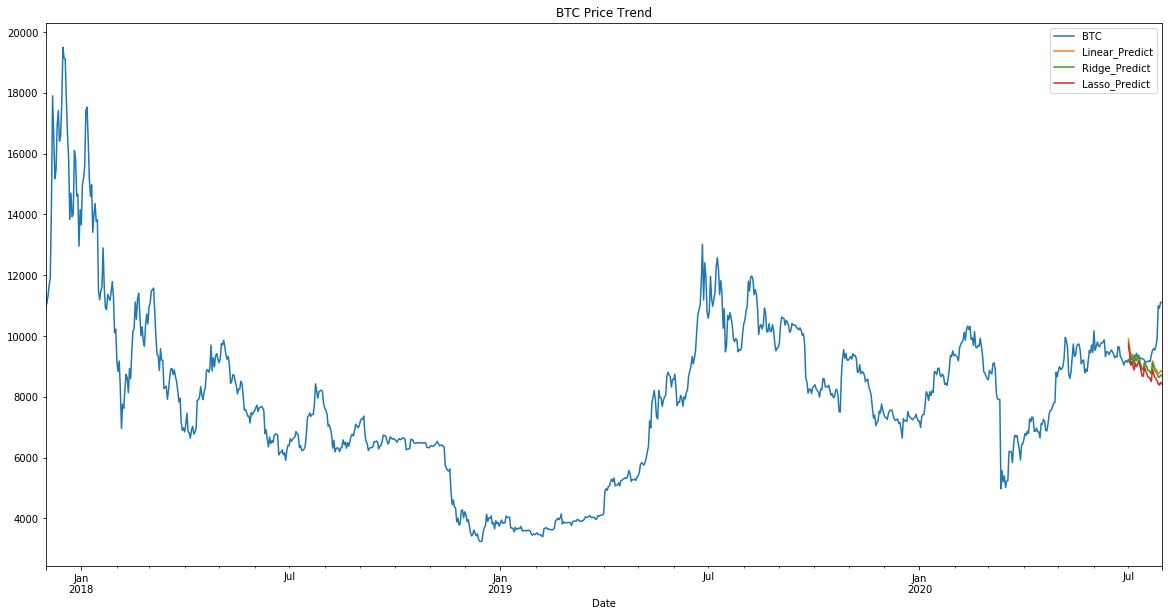

In [38]:
ax = df_2.plot(y='BTC',figsize=(20, 10), label='BTC')
pred_df.plot(ax=ax, label='Linear')
pred_df1.plot(ax=ax, label='Ridge')
pred_df2.plot(ax=ax, label='Lasso')



plt.title('BTC Price Trend')

plt.show()

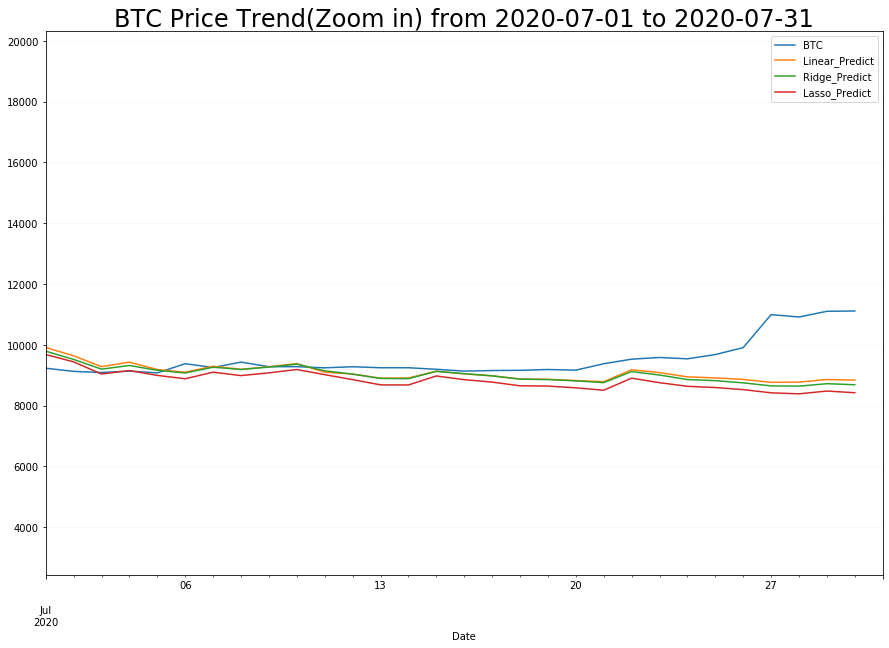

In [41]:
import matplotlib.pyplot as plt
ax = df_2.plot(y='BTC',figsize=(15, 10), label='BTC')
pred_df.plot(ax=ax, label='Linear')
pred_df1.plot(ax=ax, label='Ridge')
pred_df2.plot(ax=ax, label='Lasso')

ax.set_xlim(['2020-07-01', '2020-07-31'])
plt.title('BTC Price Trend(Zoom in) from 2020-07-01 to 2020-07-31', size = 24  )
plt.grid(True, alpha = 0.1  )
plt.show()


# Discussion & Limitation

* Linear Regression is easy to implement and interpret. Linear Regression is a great tool to analyze the relationships among the variables. But it isn’t recommended for practical applications like in this project, predicting the future price of Bitcoin, because it over-simplifies real world problems by assuming linear relationship among the variables.
* BTC is a relatively new asset (less than 10 years old) and its price has been less than 500 USD for most of its existence. Only in 2017 did its price explode to over 10,000 USD. The reason for this price explosion are not fully known, but we speculate that there was a positive feedback loop involving increased BTC reaching news headlines, which induced more attention, which induced more buying, which induced higher prices, which induced more news headlines and so forth. As this relates to predicting the price of BTC, since the discovery of BTC is a one time occurance (it cannot be "discovered" again), having these dynamics included in our training dataset may not help a model trying to predict the future and may in fact hinder it.
* Further, the drivers of BTC price are difficult to obtain due to the annonymous nature of BTC itself. Since BTC is a cryptocurrency which can be traded annonymously, it is often used by criminals to exchange payment for illicit activities such as drug dealing and money laundering https://www.nytimes.com/2020/01/28/technology/bitcoin-black-market.html. Since there is not a dataset that we can download on global drug dealing and criminal activity (as far as I'm aware), there will be variables we can't include in our model.
* Because we wanted to use a model which used external data (such as the price of oil, gold, etc.), we needed to compromise on the time period of our data since this external data wasn't readily available in such a format. We might only want to predict the price in 30 minites as opposed to 30 days. It is possible our models would perform better on more granular data.

# Self Assessment

__Yiqun Fang:__
I had no machine learning background, and the only machine learning related course I took before is INF1005 Introduction to Machine Learning workshop. At the very beginning, I was afraid that I could not make any contribution to the group work and perform badly in this course. Fortunately, Kevin and Babak are very supportive and are willing to do me a favour when I was stuck in the project. 
As a group, we determined the dataset and proposed the research questions together. Apart from that, I took the responsibility for the dataset exploratory and second research question. With the help of other group members, I completed the task. Besides, I also did the formatting and slides design for our final presentation. 

